# Problems
1. last week registered users complained about non-availabilty of bikes.
    * client segment is proffesional users (focus on work days seperately and holidays/weekends seperately)
    * problem: bikes are not available
2. contribution of weather in bike demands
3. Effects of traffic and pollution on sales (bike use)

## Questions:
1. What is the total number of bikes available in that area? according to CB, aprox. 1650 bikes (source: https://d21xlh2maitm24.cloudfront.net/wdc/cabi-2012surveyreport.pdf?mtime=20161206135939)
2. Considering the week discused is the week of Dec. 25 2012 to Dec. 31 2012
3. Source new data about traffic and pollution

Start by importing the nedded libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.multicomp import pairwise_tukeyhsd
pd.set_option('display.max_columns', 20)

In [2]:
df_day = pd.read_csv('dataset/day.csv')
df_hour = pd.read_csv('dataset/hour.csv')
df_day.dropna()
df_hour.dropna()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


* I'll change the values of the columns season,holiday,workday,weathersit to their verbal according to the given names in the readme
* I'll convert the dteday column in the day dataframe to np.datetime64 type, and in hour dataframe to np.datetime64 with the relevant hour

In [3]:
# for day_df
df_day.season = df_day.season.apply( lambda x: 'Spring' if x == 1
                                        else 'Summer' if x == 2 
                                        else 'Fall'if x==3
                                        else 'Winter')

df_day.weathersit = df_day.weathersit.apply( lambda x: 'Clear' if x == 1
                                            else 'Cloudy' if x == 2 
                                            else 'Light Rain'if x==3
                                            else 'Heavy rain')

df_day.holiday = df_day.holiday.apply( lambda x: 'Yes' if x == 1
                                        else 'No')

df_day.workingday = df_day.workingday.apply( lambda x: 'Yes' if x == 1
                                        else 'No')
df_day.drop('instant', inplace = True, axis = 1)

df_day.dteday=df_day.dteday.apply(lambda date: pd.to_datetime(date))

# for df_hour
df_hour.season = df_hour.season.apply( lambda x: 'Spring' if x == 1
                                        else 'Summer' if x == 2 
                                        else 'Fall'if x==3
                                        else 'Winter')

df_hour.weathersit = df_hour.weathersit.apply( lambda x: 'Clear' if x == 1
                                            else 'Cloudy' if x == 2 
                                            else 'Light Rain'if x==3
                                            else 'Heavy rain')

df_hour.holiday = df_hour.holiday.apply( lambda x: 'Yes' if x == 1
                                        else 'No')

df_hour.workingday = df_hour.workingday.apply( lambda x: 'Yes' if x == 1
                                        else 'No')
df_hour.drop('instant', inplace = True, axis = 1)
#Conevrting the dteday values of df_hour to include hours. I changed it a.t.m to only inlude the date as a np.datetime64 value
# for idx, row in df_hour.iterrows():
#     df_hour.at[idx, 'dteday'] = pd.to_datetime(df_hour.iloc[idx].dteday+f'T{df_hour.iloc[idx].hr}:00')
df_hour.dteday=df_hour.dteday.apply(lambda date: pd.to_datetime(date))

#retrieve temperatures for df_hour
temp_min = -8
temp_max = 39
atemp_min = -16
atemp_max = 50
df_hour.temp = df_hour.temp.apply(lambda t: t*(temp_max-temp_min)+temp_min)
df_hour.atemp = df_hour.atemp.apply(lambda t: t*(atemp_max-atemp_min)+atemp_min)

* Selecting the last week from df_day and df_hour:

In [4]:
df_day_lw=df_day[(df_day.dteday > pd.to_datetime('2012-12-24') )& (df_day.dteday <= pd.to_datetime('2012-12-31'))]
df_hour_lw=df_hour[(df_hour.dteday > pd.to_datetime('2012-12-24') )& (df_hour.dteday <= pd.to_datetime('2012-12-31'))]

In [5]:
df_hour.head(5)

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,Spring,0,1,0,No,6,No,Clear,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,Spring,0,1,1,No,6,No,Clear,0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01,Spring,0,1,2,No,6,No,Clear,0.22,0.2727,0.80,0.0,5,27,32
3,2011-01-01,Spring,0,1,3,No,6,No,Clear,0.24,0.2879,0.75,0.0,3,10,13
4,2011-01-01,Spring,0,1,4,No,6,No,Clear,0.24,0.2879,0.75,0.0,0,1,1


Lets check the use trends 

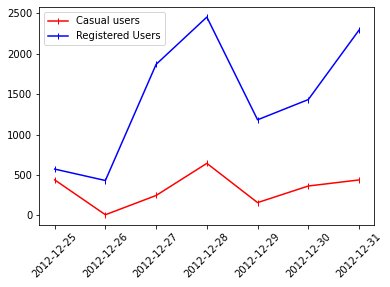

In [6]:
x = df_day_lw.dteday
y1=df_day_lw.casual
y2=df_day_lw.registered
plt.plot(x,y1,'|-r',label = 'casual users'.capitalize())
plt.plot(x,y2,'|-b',label='Registered Users')
plt.xticks(rotation=45)
plt.legend()

# Perliminary solution:
* mobilization team that moves bikes from areas of low demand to area of high demand
* purchasing more bikes
* pay-per-gig position of moving bikes from areas of low demand to area of high demand (wolt model)

# Perliminary conclusions:
* Bike use by registered users is betwee 2 to 5 times higher than bike use by casual users.
* 12.27,12.28 were days of significant bike use increase by both registered and casual users.
* 12.31 saw a significant use increase only in registered users.
## Question:
* assuming that use time for working professionals is between 07:00 am to 09:00 am and 16:00 pm to 18:00 pm, I would continue to plot the hourly use trend of bikes in each of those days.

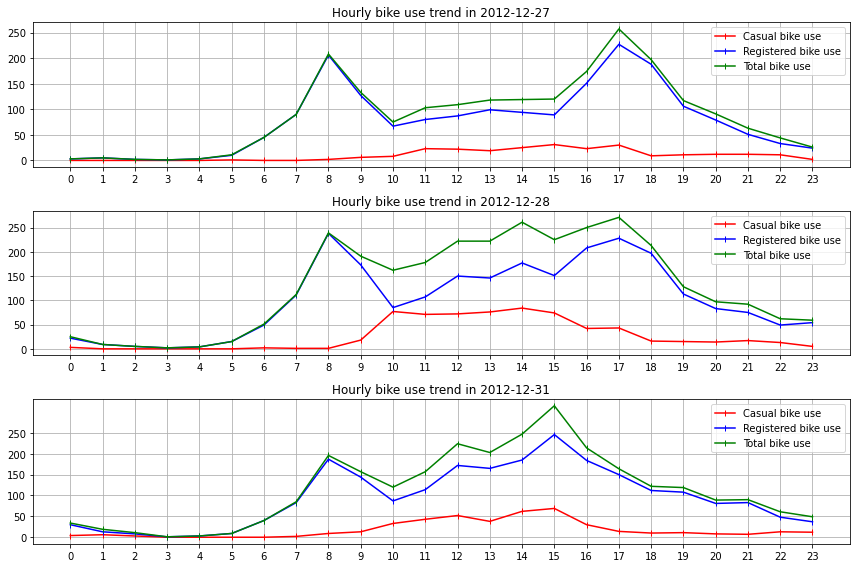

In [27]:
fig,axes = plt.subplots(nrows = 3, ncols = 1, figsize = (12,8))
days = ['2012-12-27','2012-12-28','2012-12-31']
for ind, day in enumerate(days):
    plt_df = df_hour[df_hour.dteday == pd.to_datetime(day)]
    # display(plt_df)
    x = plt_df.hr.to_numpy()
    y1 = plt_df.casual.to_numpy()
    y2=plt_df.registered.to_numpy()
    y3=plt_df.cnt.to_numpy()
    # print(x)
    title = f'Hourly bike use trend in {str(day)}'
    axes[ind].plot(x,y1,'|-r',label = 'Casual bike use')
    axes[ind].plot(x,y2,'|-b',label='Registered bike use')
    axes[ind].plot(x,y3,'|-g',label='Total bike use')
    axes[ind].set_xticks(x)
    axes[ind].set_yticks(np.arange(0,300,50))
    axes[ind].grid(b=True,which='major')
    axes[ind].legend()
    axes[ind].set_title(title)
    fig.tight_layout()
plt.show()




# Answer to question 1:
* There's an increase of registered user bike use during business commute hours
* Total bike use is below 300 counts, therefore, I assume that the problem lays in optimizing bike availability in high traffic locations. A solution as gig-job for transfering bikes from low demand areas into high demand areas may solve this problem

# How does the weather affects bike use?
* I will plot the daily bike use for each weather

In [40]:
test=pd.read_csv('dataset/day.csv')
test.weathersit.unique()

array([2, 1, 3])

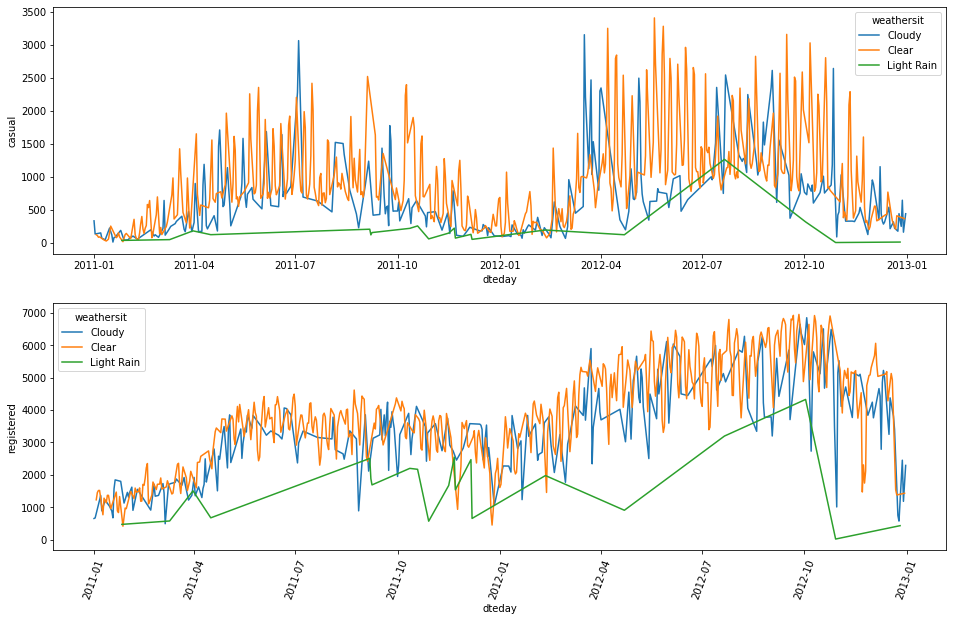

In [43]:
fig,ax = plt.subplots(nrows=2,ncols=1,figsize=(16,10))
uses = ['casual','registered']
for ind,use in enumerate(uses):
    sns.lineplot(data=df_day,x='dteday',y=use,hue='weathersit',ax=ax[ind])
    plt.xticks(rotation=70)


## Casual users:
* between 01.2011 to 05.2012 the use in rainy days was steady, but had an increase between the summer to fall 2012(05.2012-11.2012).
* in cloudy and clear days, there is a visible trend of increase of use from spring to fall and decrease during the winter.
## Registered users
* Clear or cloudy weather is associated with higher bike use than light rain weather.
* use trends is similar between all of the registered weather situations - increase of use between May to November and decrease between December to May

# Perliminary tasks:
* during peak use hours, identify and map peak use locations
* Use OpenDC to get data on those locations in specific times

# Polution
* Scrape data from cleanairpartners.net

# Effects of Trafic and pollution on bike use
## Traffic
* Source:
  * 2012,2011 Traffic volume, D.C. Office of the Chief Technology Officer | DCGISopendat
* Preprocessing:
  * data was merged with hourly bike use data